## Title: House Grade Prediction

### Bussiness purpose: Model to predict the grade of house(A,B,C,D,E).

In [1]:
#Importing the required Library.
import numpy as np                                                #for array and numerical data calculation
import pandas as pd                                               #for making dataframe and loding data
import matplotlib.pyplot as plt                                   #for visualization
import seaborn as sns                                             #for visualization
from numpy import mean,std                                        #for mathematical calculation

from sklearn import preprocessing,metrics                         #for model precpocessing steps and various score metrics
from sklearn.model_selection import train_test_split              # for splitting of data into train and test
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,recall_score,precision_score
#for calculating various score metrics
import warnings                                                   # to filter out warnings
warnings.simplefilter(action='ignore')

In [2]:
#Data Fecthing
hou=pd.read_csv("C:/Users/acer/Downloads/Project2_Classification_HouseGrade_Data_Project-625edbc5-68f4-4fe4-97f2-29ba63a71a0e.csv")

#data set preview
hou.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D


In [3]:
#Checking Datatypes
hou.dtypes

Id                 int64
Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

In [4]:
#Changing categorical data into category type
hou['roof'] =hou['roof'].astype('category')
hou['Grade']=hou['Grade'].astype('category')
hou.dtypes

Id                   int64
Area(total)          int64
Trooms               int64
Nbedrooms            int64
Nbwashrooms          int64
Twashrooms           int64
roof              category
Roof(Area)           int64
Lawn(Area)           int64
Nfloors              int64
API                  int64
ANB                  int64
Expected price       int64
Grade             category
dtype: object

In [5]:
#Checking the Structure of dataset
hou.shape

(3000, 14)

In [6]:
#summary of the data
hou.describe()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,1500.500000,325.117000,7.021667,5.023000,4.513667,6.010667,48.980667,95.609333,4.013333,70.190667,3.47900,3782.938333
std,866.169729,20.507742,1.421221,1.634838,1.715263,1.786136,48.746641,14.837388,1.621532,17.563460,1.69426,567.189995
min,1.000000,290.000000,5.000000,2.000000,1.000000,2.000000,0.000000,70.000000,1.000000,40.000000,1.00000,2504.000000
25%,750.750000,308.000000,6.000000,4.000000,3.000000,5.000000,0.000000,83.000000,3.000000,55.000000,2.00000,3354.000000
50%,1500.500000,325.000000,7.000000,5.000000,4.000000,6.000000,71.000000,96.000000,4.000000,70.000000,4.00000,3771.000000
75%,2250.250000,343.000000,8.000000,6.000000,6.000000,7.000000,96.000000,109.000000,5.000000,85.000000,5.00000,4208.000000
max,3000.000000,360.000000,9.000000,8.000000,8.000000,10.000000,120.000000,120.000000,7.000000,100.000000,6.00000,5216.000000


In [7]:
#Checking missing values.
hou.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

No missing values.

### EDA 

#### Univariate Analysis.

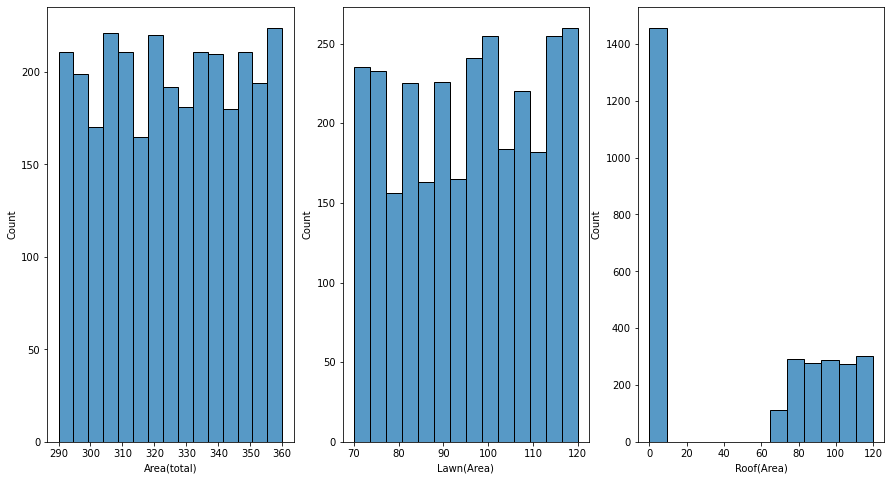

In [8]:
fig,ax=plt.subplots(1,3,figsize=(15,8))
#Area(total)
sns.histplot(x=hou['Area(total)'],ax=ax[0])
#Lawn(Area)
sns.histplot(x=hou['Lawn(Area)'],ax=ax[1])
#Roof(Area)
sns.histplot(x=hou['Roof(Area)'],ax=ax[2]);

Count properties Area 350-360 is more followed by 320 total area.

Count of properties Lawn Area is 120 is more.

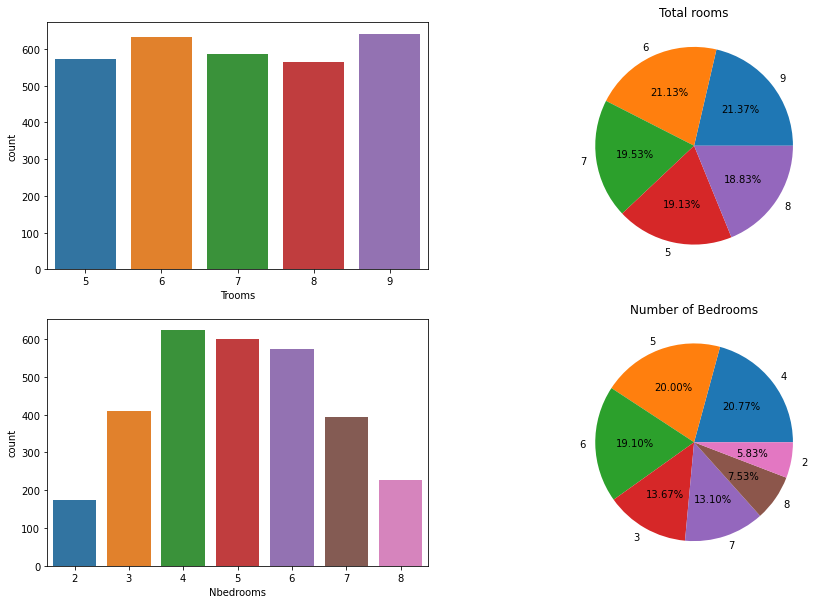

In [9]:
fig,ax=plt.subplots(2,2,figsize=(15,10))
#Total rooms analysis
sns.countplot(hou["Trooms"],ax=ax[0][0])
ax[0][1].pie(x=hou["Trooms"].value_counts(),labels=hou["Trooms"].value_counts().index,autopct='%.2f%%')
ax[0][1].title.set_text('Total rooms');


#Number of Bedrooms in house
sns.countplot(hou["Nbedrooms"],ax=ax[1][0])
ax[1][1].pie(x=hou["Nbedrooms"].value_counts(),labels=hou["Nbedrooms"].value_counts().index,autopct='%.2f%%')
plt.title('Number of Bedrooms');

9 number of rooms are greatest followed by 6 number of rooms.

4 Number Bedrooms are greatest followed by 5 Number of Bedrooms.

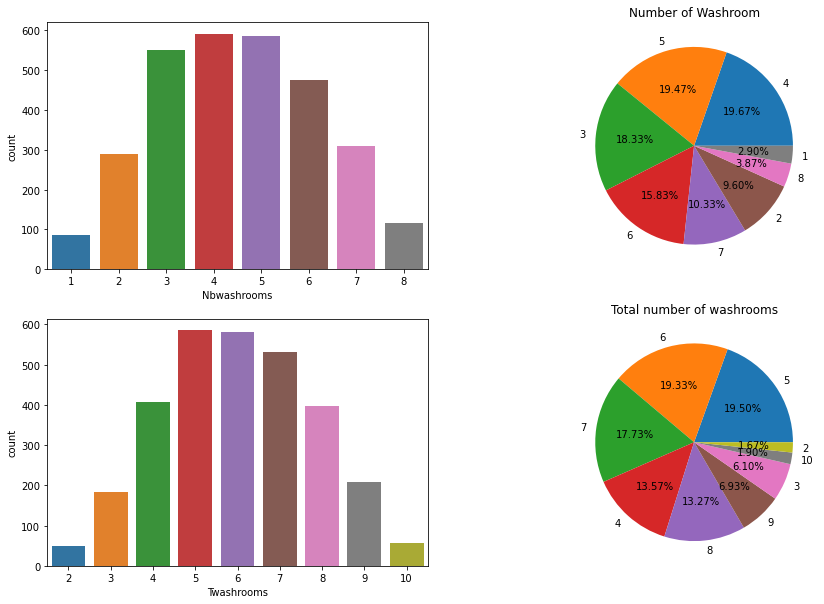

In [10]:
fig,ax=plt.subplots(2,2,figsize=(15,10))
#Number of Washrooms in house
sns.countplot(hou["Nbwashrooms"],ax=ax[0][0])
ax[0][1].pie(x=hou["Nbwashrooms"].value_counts(),labels=hou["Nbwashrooms"].value_counts().index,autopct='%.2f%%')
ax[0][1].title.set_text('Number of Washroom');

#Total number of washrooms
sns.countplot(hou["Twashrooms"],ax=ax[1][0])
ax[1][1].pie(x=hou["Twashrooms"].value_counts(),labels=hou["Twashrooms"].value_counts().index,autopct='%.2f%%')
ax[1][1].title.set_text('Total number of washrooms');

5 number of NBwashrooms are larger in number as compared to other.

6 number of washrooms are larger in number as compared to other.

#### Bi-variate analysis.

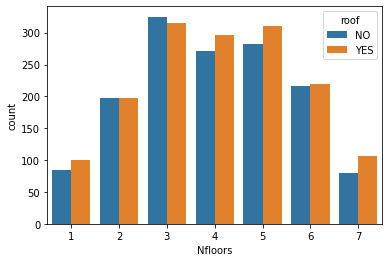

In [11]:
#Number of floors w.r.t having roof or not
sns.countplot(x=hou['Nfloors'],hue=hou['roof']);

Grade D houses are more in number in price ranging upto 3700.

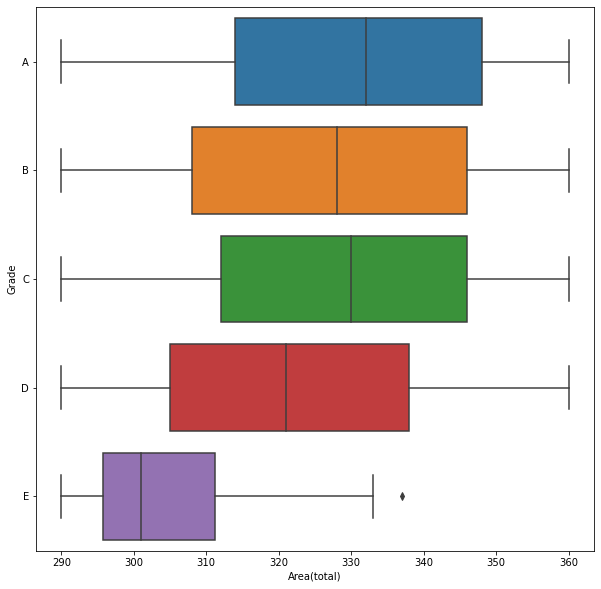

In [12]:
#Area of house w.r.t to Grade of house
plt.figure(figsize=(10,10))
sns.boxplot(x=hou['Area(total)'],y=hou['Grade']);

Grade D house are larger in all total areas given.

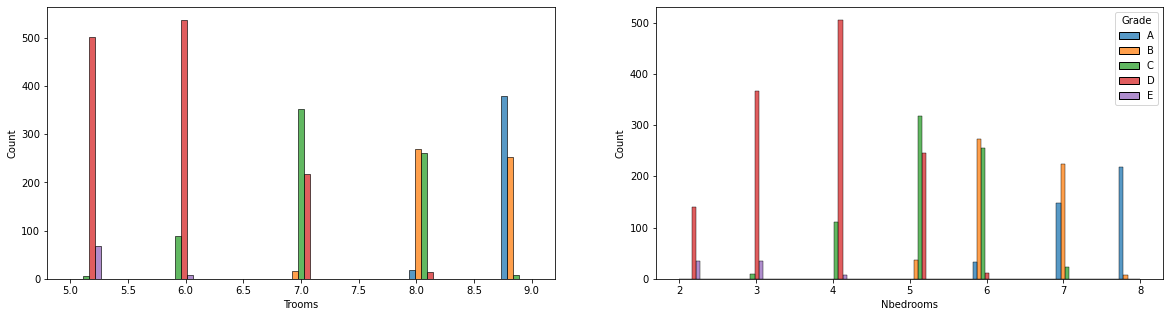

In [13]:
#Total Rooms in house w.r.t to Grade of house
fig,ax=plt.subplots(1,2,figsize=(20,5))
sns.histplot(x=hou['Trooms'],hue=hou['Grade'],multiple='dodge',ax=ax[0],legend=False)


#Number of bedrooms in house w.r.t to Grade of house
sns.histplot(x=hou['Nbedrooms'],hue=hou['Grade'],multiple='dodge',ax=ax[1]);

Total Rooms:

Grade D house have more 5-6 rooms houses.

Grade C house have more 7 rooms houses.

Grade B house have more 8 rooms houses.

Grade A house have more 9 rooms houses.

Number of bedrooms:

Grade D house have more 2-4 bedrooms houses.

Grade C house have more 5 bedrooms houses.

Grade B house have more 6-7 bedrooms houses.

Grade A house have more 9 bedrooms houses.

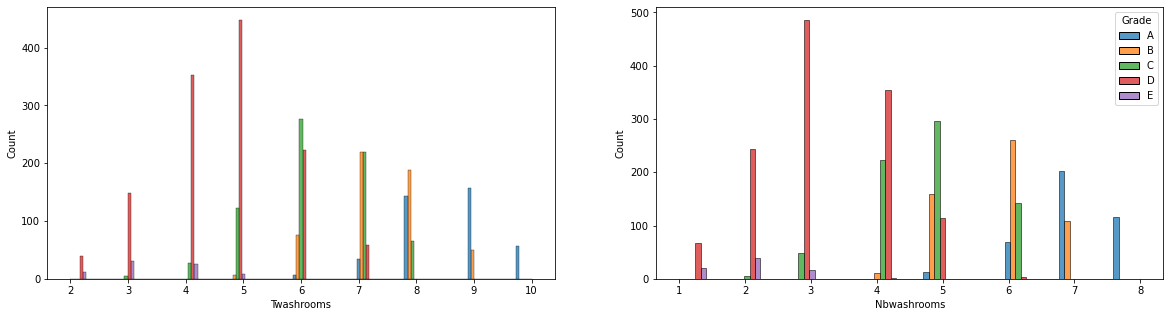

In [14]:
fig,ax=plt.subplots(1,2,figsize=(20,5))
#Total washroom in house w.r.t to Grade of house
sns.histplot(x=hou['Twashrooms'],hue=hou['Grade'],multiple='dodge',ax=ax[0],legend=False);

#Number of attached washroom in house w.r.t to Grade of house
sns.histplot(x=hou['Nbwashrooms'],hue=hou['Grade'],multiple='dodge',ax=ax[1]);

Total washroom:

Grade D house have more 2-5 washrooms houses.

Grade C house have more 6 washrooms houses.

Grade B and C house have more 7 washrooms houses.

Grade B house have more 8 washrooms houses.

Grade A house have more 9-10 washrooms houses.


Number of attached washroom :

Grade D house have more 1-4 attached washrooms houses.

Grade C house have more 5 attached washrooms houses.

Grade D house have more 6 attached washrooms houses.

Grade A house have more 7-8 attached washrooms houses.


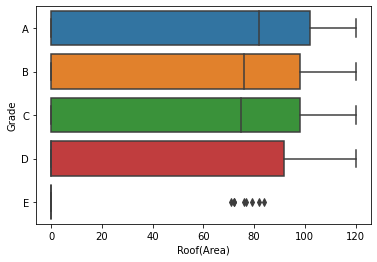

In [15]:

#Roof Area of house w.r.t to Grade of house
sns.boxplot(x=hou['Roof(Area)'],y=hou['Grade']);



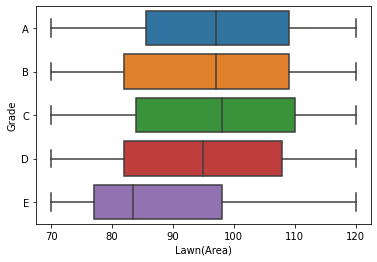

In [16]:
#Lawn area in house w.r.t to Grade of house
sns.boxplot(x=hou['Lawn(Area)'],y=hou['Grade']);

Lawn Area is greatest in grade C houses followed by grade C houses.

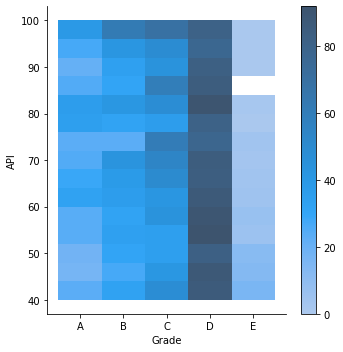

In [17]:
#Air Pollution Index in house w.r.t to Grade of house
sns.displot(y=hou['API'],x=hou['Grade'],cbar=True);

Density of Grade D houses is more as well as there are more houses whose  Airpollution Index is also more for them.

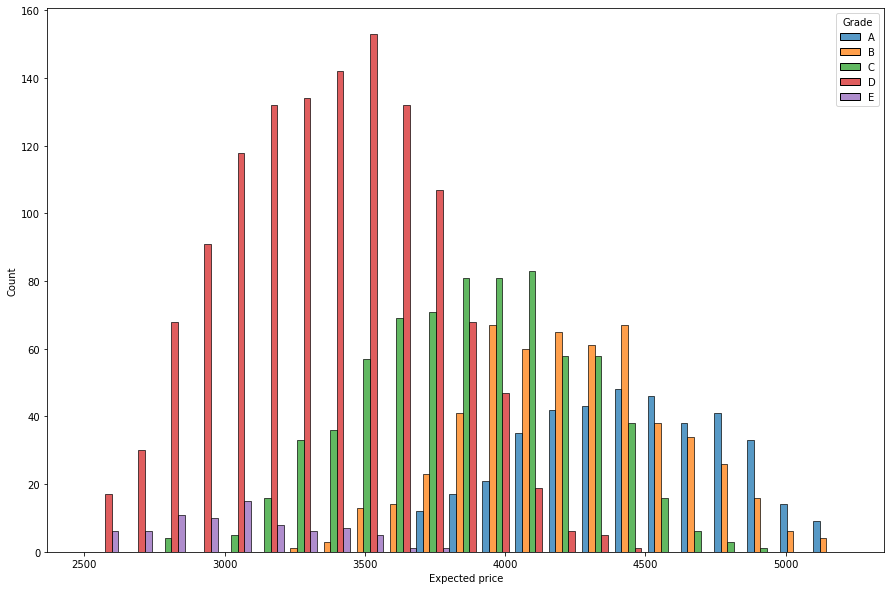

In [18]:
#Expected price w.r.t to Grade of house
plt.figure(figsize=(15,10))
sns.histplot(x=hou['Expected price'],hue=hou['Grade'],multiple='dodge');

In [19]:
hous=hou.drop('Id',axis=1) # as its just unique value for all entries and doesn't affecting the price or grade of houses.
hous.head()

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,320,7,4,4,5,NO,0,75,3,40,1,3843,D


'Id' feature doesn't help in grade of house so dropped it.

In [20]:
#Done labelling for categorical datatype
le=preprocessing.LabelEncoder()
hous['roof']=le.fit_transform(hous['roof'])
hous['Grade']=le.fit_transform(hous['Grade'])
hous.head()

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,339,6,5,4,6,0,0,76,2,79,6,3481,3
1,358,5,4,3,4,1,71,96,3,72,4,3510,3
2,324,7,5,4,5,1,101,117,5,64,3,3748,2
3,330,6,4,3,5,1,101,82,2,59,2,3134,3
4,320,7,4,4,5,0,0,75,3,40,1,3843,3


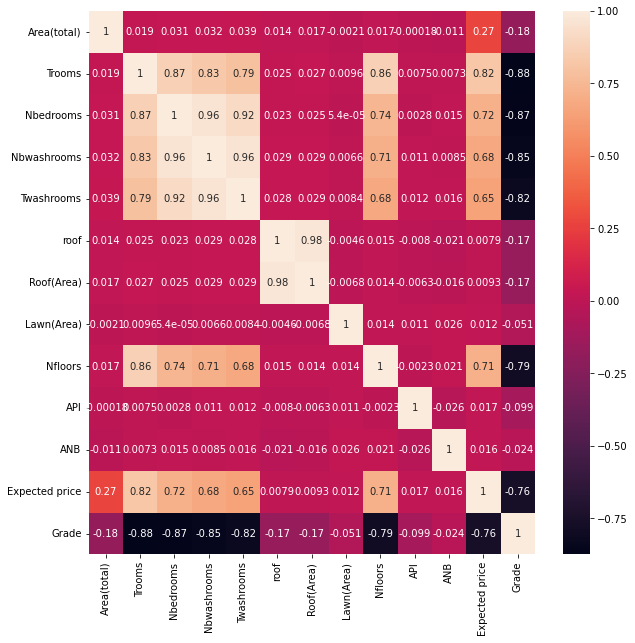

In [21]:
#Seeing correlation for feature selection
plt.figure(figsize=(10,10))
sns.heatmap(hous.corr(),annot=True);

As target variable is categorical so we will build classifiation model.

Here are target variable is Grade.

Here we can drop the feature/columns which are less correlated with the target column.

So we are drooping Area(total),roof,Roof(Area),Lawn(Area),API,ANB as they are less correlated with target column.

In [22]:
hous.drop(['Area(total)','roof','Roof(Area)','Lawn(Area)','API','ANB'],axis=1,inplace=True)

In [23]:
hous.shape

(3000, 7)

### Training and testing Split.

In [24]:
X=hous.iloc[:,:6] 
y=hous.iloc[:,-1] 

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=.3,stratify=y,random_state=22) #test size is taken 30% of the data

#Scaling the data 
scaler=preprocessing.StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### Going to implement various classification model.

### Logistics Regression

In [25]:
from sklearn.linear_model import LogisticRegression 

### Model fitting and building

In [26]:
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

### Training model score.

In [27]:
log_model.score(X_train,y_train)

0.8066666666666666

### Training model score

In [28]:
y_pred_log=log_model.predict(X_test)

### Calculating Various Score Parameter.

In [29]:
conf_log=confusion_matrix(y_pred_log,y_test)
prec_log=precision_score(y_pred_log,y_test,average='weighted')
accu_log=accuracy_score(y_pred_log,y_test)
f1_log  =f1_score(y_pred_log,y_test,average='weighted')
rec_log =recall_score(y_pred_log,y_test,average='weighted')
print('\nConfuion Matrix: ','\n',conf_log,'\nPrecision Score: ',prec_log,'\nAccuracy score: ',accu_log,
     '\nf1-score: ',f1_log,'\nRecall Score: ',rec_log)


Confuion Matrix:  
 [[106  15   0   0   0]
 [ 13 115  16   0   0]
 [  0  32 142  34   0]
 [  0   0  57 347  23]
 [  0   0   0   0   0]] 
Precision Score:  0.818083880151856 
Accuracy score:  0.7888888888888889 
f1-score:  0.8016929957214884 
Recall Score:  0.7888888888888889


### Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB

### Model fitting and building

In [31]:
nb_model=GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

### Training model score.

In [32]:
nb_model.score(X_train,y_train)

0.7371428571428571

### Prediction on Testing dataset.

In [33]:
y_pred_nb=nb_model.predict(X_test)

### Calculating Various Score Parameter.

In [34]:
conf_nb=confusion_matrix(y_pred_nb,y_test)
prec_nb=precision_score(y_pred_nb,y_test,average='weighted')
accu_nb=accuracy_score(y_pred_nb,y_test)
f1_nb  =f1_score(y_pred_nb,y_test,average='weighted')
rec_nb =recall_score(y_pred_nb,y_test,average='weighted')
print('\nConfuion Matrix: ','\n',conf_nb,'\nPrecision Score: ',prec_nb,'\nAccuracy score: ',accu_nb,
     '\nf1-score: ',f1_nb,'\nRecall Score: ',rec_nb)


Confuion Matrix:  
 [[106  13   0   0   0]
 [ 13 126  23   0   0]
 [  0  23 154  61   0]
 [  0   0  38 267   7]
 [  0   0   0  53  16]] 
Precision Score:  0.7434667643288775 
Accuracy score:  0.7433333333333333 
f1-score:  0.7313717432922732 
Recall Score:  0.7433333333333333


### Decision tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier

### Model fitting and building

In [36]:
dtr_model=DecisionTreeClassifier(max_depth=4)
dtr_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

### Training model score.

In [37]:
dtr_model.score(X_train,y_train)

0.780952380952381

### Prediction on Testing dataset.

In [38]:
y_pred_dtr=dtr_model.predict(X_test)

### Calculating Various Score Parameter.

In [39]:
conf_dtr=confusion_matrix(y_pred_dtr,y_test)
prec_dtr=precision_score(y_pred_dtr,y_test,average='weighted')
accu_dtr=accuracy_score(y_pred_dtr,y_test)
f1_dtr =f1_score(y_pred_dtr,y_test,average='weighted')
rec_dtr =recall_score(y_pred_dtr,y_test,average='weighted')
print('\nConfuion Matrix: ','\n',conf_dtr,'\nPrecision Score: ',prec_dtr,'\nAccuracy score: ',accu_dtr,
     '\nf1-score: ',f1_dtr,'\nRecall Score: ',rec_dtr)


Confuion Matrix:  
 [[ 95   6   0   0   0]
 [ 24 107   5   0   0]
 [  0  49 146  35   0]
 [  0   0  64 346  23]
 [  0   0   0   0   0]] 
Precision Score:  0.7998517291323959 
Accuracy score:  0.7711111111111111 
f1-score:  0.7821291607503054 
Recall Score:  0.7711111111111111


### Bagging

### Model fitting and building

In [40]:
from sklearn.ensemble import RandomForestClassifier
RND_model=RandomForestClassifier()
RND_model.fit(X_train,y_train)

RandomForestClassifier()

### Training model score.

In [41]:
RND_model.score(X_train,y_train)

0.9980952380952381

### Prediction on Testing dataset.

In [42]:
y_pred_RND=RND_model.predict(X_test)

### Calculating Various Score Parameter.

In [43]:
conf_RND=confusion_matrix(y_pred_RND,y_test)
prec_RND=precision_score(y_pred_RND,y_test,average='weighted')
accu_RND=accuracy_score(y_pred_RND,y_test)
f1_RND =f1_score(y_pred_RND,y_test,average='weighted')
rec_RND =recall_score(y_pred_RND,y_test,average='weighted')
print('\nConfuion Matrix: ','\n',conf_RND,'\nPrecision Score: ',prec_RND,
      '\nAccuracy score: ',accu_RND,
     '\nf1-score: ',f1_RND,'\nRecall Score: ',rec_RND)


Confuion Matrix:  
 [[103  18   0   0   0]
 [ 16 100  17   0   0]
 [  0  41 137  48   0]
 [  0   3  61 325  22]
 [  0   0   0   8   1]] 
Precision Score:  0.7575789063595371 
Accuracy score:  0.74 
f1-score:  0.7470201827549486 
Recall Score:  0.74


### Boosting 

### Model fitting and building

In [44]:
from sklearn.ensemble import AdaBoostClassifier #importing required model classifier
Ada_model=AdaBoostClassifier()
Ada_model.fit(X_train,y_train)

AdaBoostClassifier()

### Training model score.

In [45]:
Ada_model.score(X_train,y_train)

0.7623809523809524

### Prediction on Testing dataset.

In [46]:
y_pred_Ada=Ada_model.predict(X_test)

### Calculating Various Score Parameter.

In [47]:
conf_Ada=confusion_matrix(y_pred_Ada,y_test)
prec_Ada=precision_score(y_pred_Ada,y_test,average='weighted')
accu_Ada=accuracy_score(y_pred_Ada,y_test)
f1_Ada =f1_score(y_pred_Ada,y_test,average='weighted')
rec_Ada =recall_score(y_pred_Ada,y_test,average='weighted')
print('\nConfuion Matrix: ','\n',conf_Ada,'\nPrecision Score: ',prec_Ada,
      '\nAccuracy score: ',accu_Ada,
     '\nf1-score: ',f1_Ada,'\nRecall Score: ',rec_Ada)


Confuion Matrix:  
 [[110  23   0   0   0]
 [  9  90   5   0   0]
 [  0  49 176  79   0]
 [  0   0  34 302  23]
 [  0   0   0   0   0]] 
Precision Score:  0.7934849422132008 
Accuracy score:  0.7533333333333333 
f1-score:  0.7618775445734173 
Recall Score:  0.7533333333333333


### Stacking

In [48]:
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

In [49]:
def stacking():
    stack=[]
    stack.append(('LOG',LogisticRegression()))
    stack.append(('NB',GaussianNB()))
    stack.append(('DTC',DecisionTreeClassifier()))
    stack.append(('SVC',SVC()))
    meta_model=LogisticRegression()
    model=StackingClassifier(estimators=stack,final_estimator=meta_model,cv=3)
    return model

### Model fitting and building

In [50]:
St_model=stacking()
St_model.fit(X_train,y_train)

StackingClassifier(cv=3,
                   estimators=[('LOG', LogisticRegression()),
                               ('NB', GaussianNB()),
                               ('DTC', DecisionTreeClassifier()),
                               ('SVC', SVC())],
                   final_estimator=LogisticRegression())

### Training model score.

In [51]:
St_model.score(X_train,y_train)

0.820952380952381

### Prediction on Testing dataset.

In [52]:
y_pred_St=St_model.predict(X_test)

### Calculating Various Score Parameter.

In [53]:
conf_St=confusion_matrix(y_pred_St,y_test)
prec_St=precision_score(y_pred_St,y_test,average='weighted')
accu_St=accuracy_score(y_pred_St,y_test)
f1_St =f1_score(y_pred_St,y_test,average='weighted')
rec_St =recall_score(y_pred_St,y_test,average='weighted')
print('\nConfuion Matrix: ','\n',conf_St,'\nPrecision Score: ',prec_St,
      '\nAccuracy score: ',accu_St,
     '\nf1-score: ',f1_St,'\nRecall Score: ',rec_St)


Confuion Matrix:  
 [[108  15   0   0   0]
 [ 11 117  15   0   0]
 [  0  30 137  27   0]
 [  0   0  63 354  23]
 [  0   0   0   0   0]] 
Precision Score:  0.8303839246306401 
Accuracy score:  0.7955555555555556 
f1-score:  0.8098911969127733 
Recall Score:  0.7955555555555556


In [54]:
#Making Dataframe for comparison of various model's score's
Comp=pd.DataFrame()
Comp['Model']    =pd.Series(['Logistic','Naive-Bayes','Decision Tree','Bagging','Boosting','Stacking'])
Comp['Precision']=pd.Series([prec_log,prec_nb,prec_dtr,prec_RND,prec_Ada,prec_St])
Comp['Recall']   =pd.Series([rec_log,rec_nb,rec_dtr,rec_RND,rec_Ada,rec_St])
Comp['f1-score'] =pd.Series([f1_log,f1_nb,f1_dtr,f1_RND,f1_Ada,f1_St])
Comp['Accuracy'] =pd.Series([accu_log,accu_nb,accu_dtr,accu_Ada,accu_RND,accu_St])
Comp.set_index('Model')

,Precision,Recall,f1-score,Accuracy
Model,,,,
Logistic,0.818084,0.788889,0.801693,0.788889
Naive-Bayes,0.743467,0.743333,0.731372,0.743333
Decision Tree,0.799852,0.771111,0.782129,0.771111
Bagging,0.757579,0.740000,0.747020,0.753333
Boosting,0.793485,0.753333,0.761878,0.740000
Stacking,0.830384,0.795556,0.809891,0.795556


### As from above score parameter's we can select stacking model as the best model.

#### ROC_AUC Score and Curve For Multiclass Label

In [55]:
from sklearn.preprocessing import LabelBinarizer #to binalize the mutliclass labes

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  

(900, 5)

In [56]:
y_pred_pro_St=St_model.predict_proba(X_test) #probabiltiy prediction on Stacking model


In [58]:
from sklearn.metrics import RocCurveDisplay,roc_auc_score,roc_curve #for ROC_AUC score and curve

In [59]:
roc_auc_score(y_test,y_pred_pro_St,multi_class="ovr", average="macro") #Calculting ROC_AUC Score,OVR=One V/s Rest test

0.9511709812296305

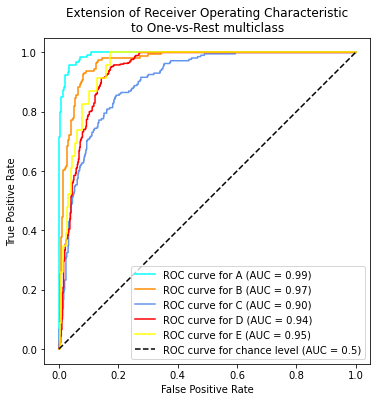

In [60]:
fig, ax = plt.subplots(figsize=(6, 6))

class_i=['A','B','C','D','E']

colors = ["aqua", "darkorange", "cornflowerblue",'red','yellow']
for class_id, color in zip(range(5), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_pred_pro_St[:, class_id],
        name=f"ROC curve for {class_i[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()

In [61]:
print(classification_report(y_pred_St,y_test))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       123
           1       0.72      0.82      0.77       143
           2       0.64      0.71      0.67       194
           3       0.93      0.80      0.86       440
           4       0.00      0.00      0.00         0

    accuracy                           0.80       900
   macro avg       0.64      0.64      0.64       900
weighted avg       0.83      0.80      0.81       900

